In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os  
from matplotlib.ticker import PercentFormatter
from scipy.optimize import curve_fit
import csv

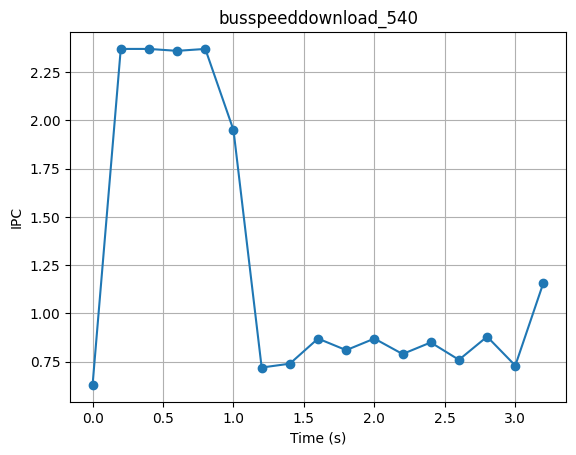

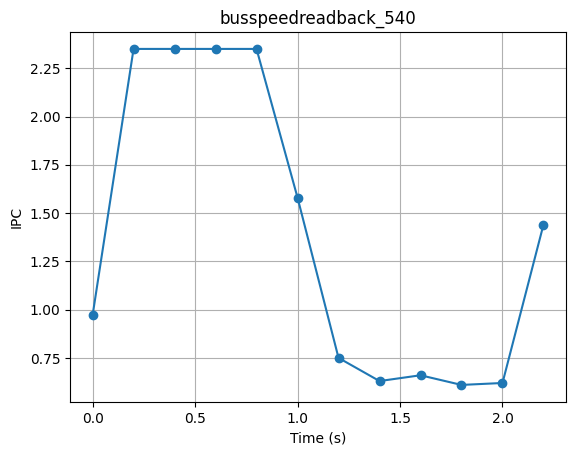

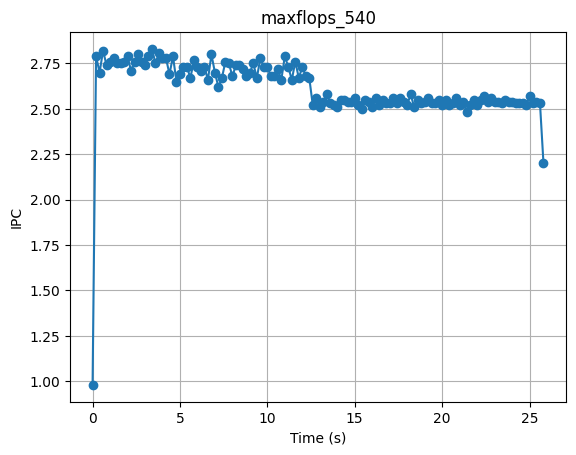

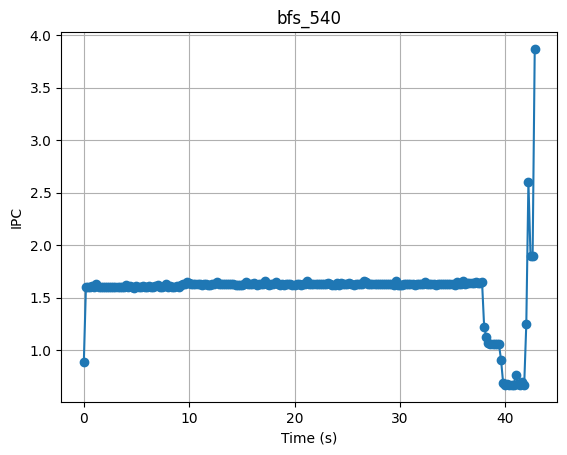

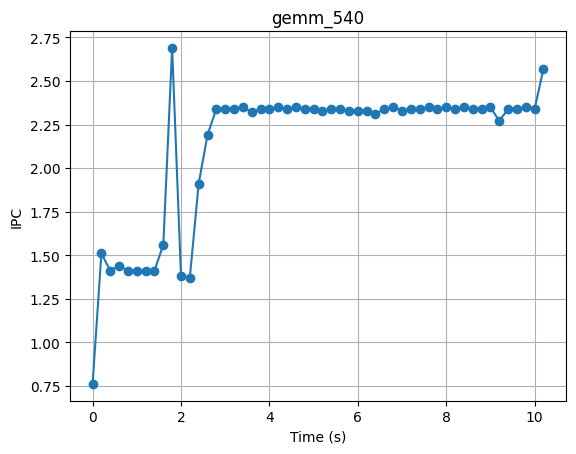

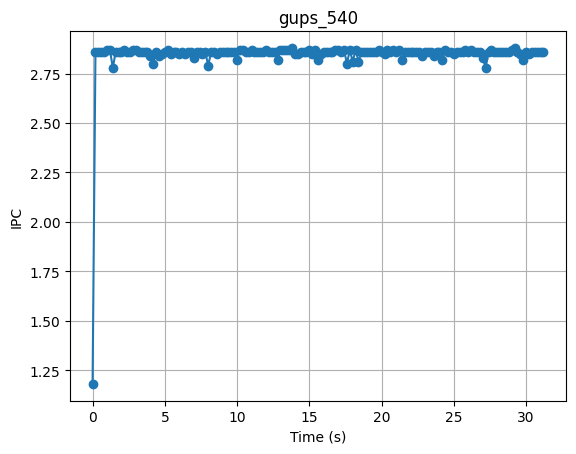

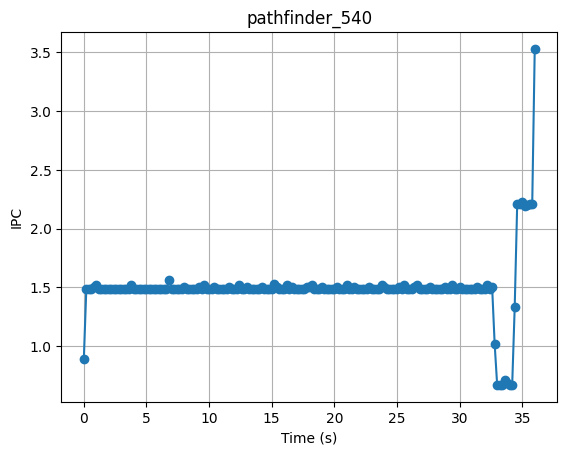

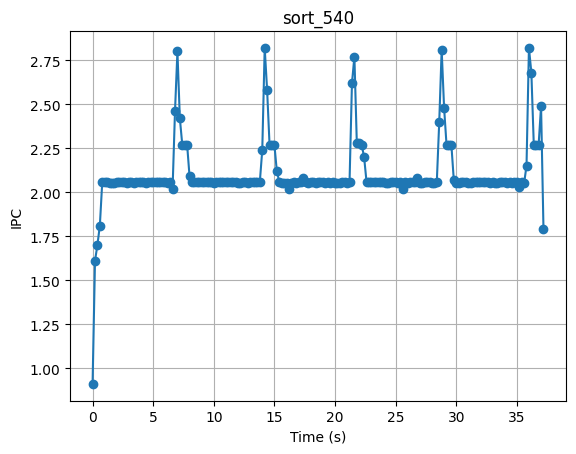

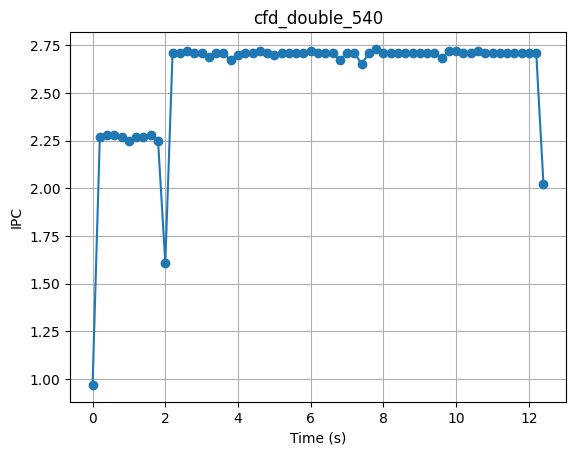

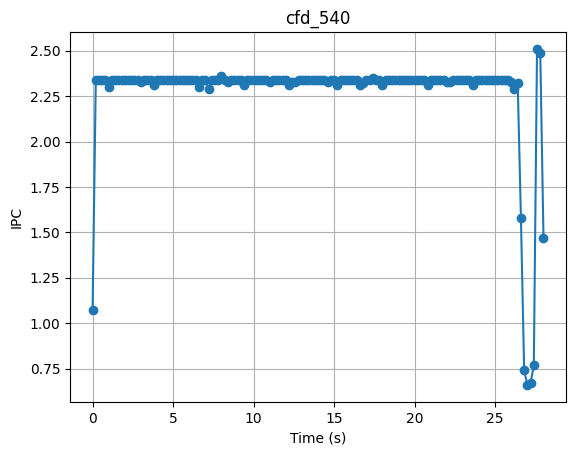

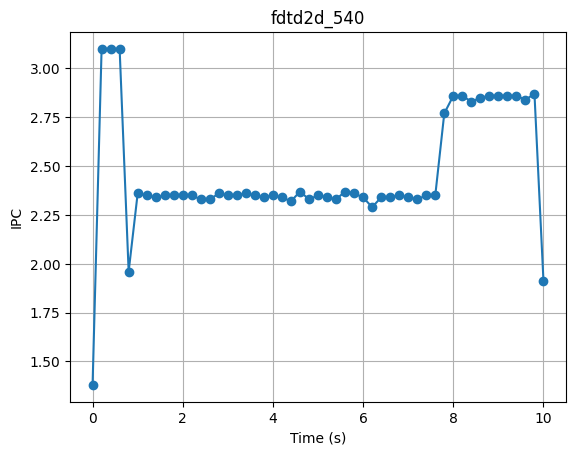

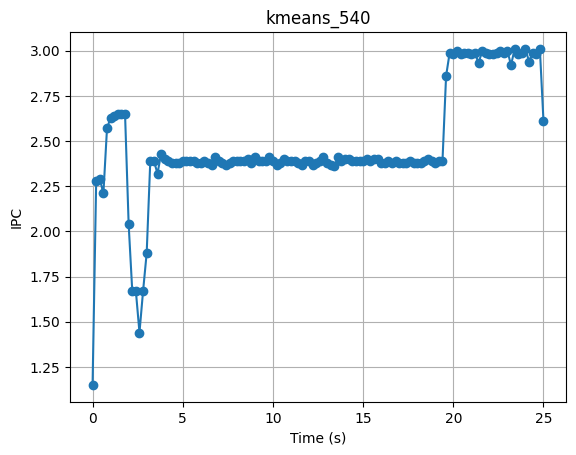

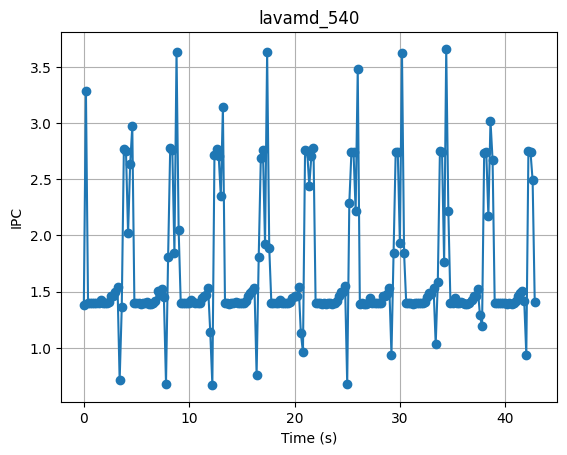

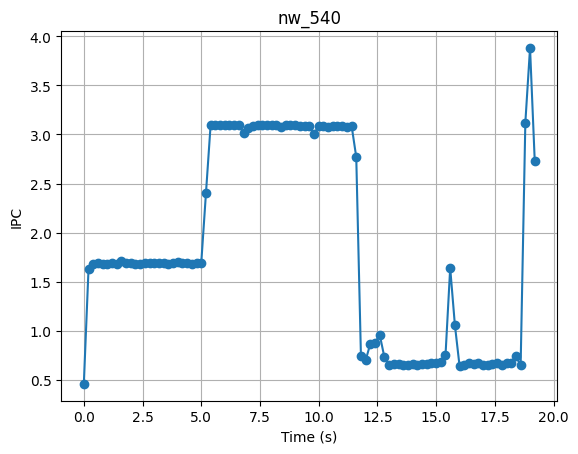

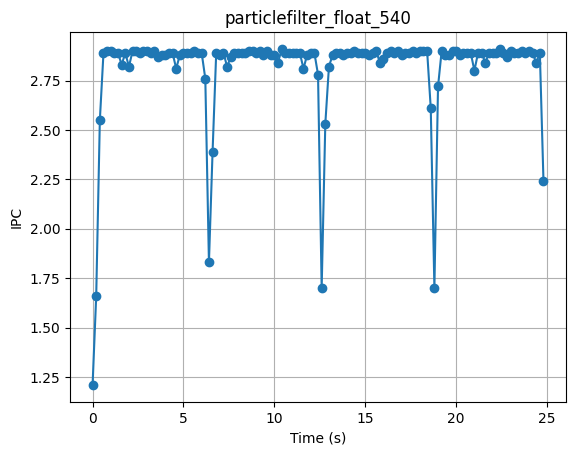

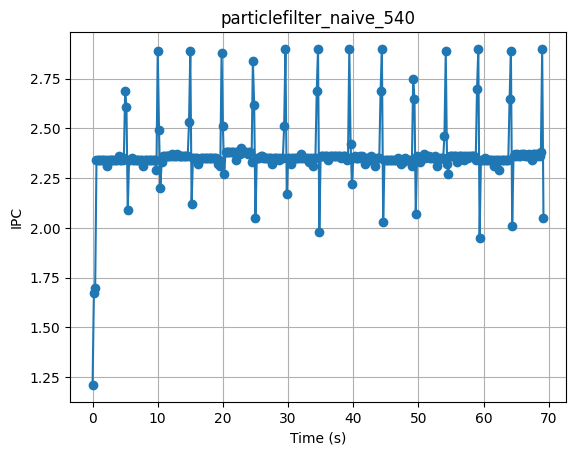

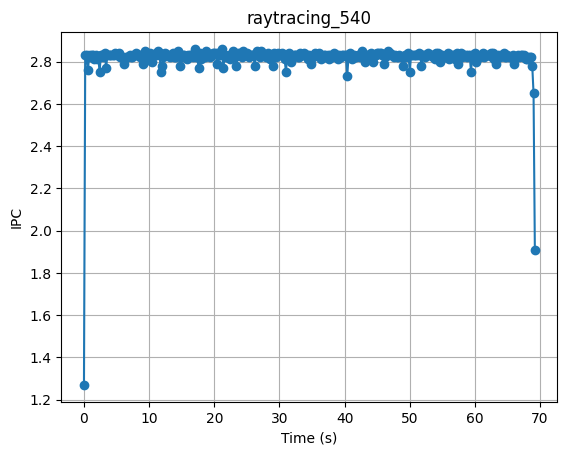

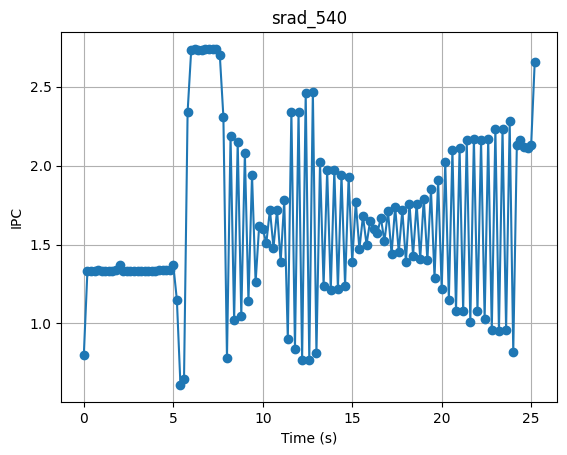

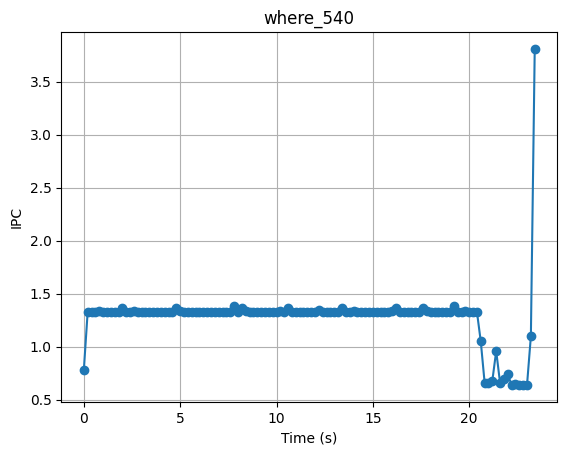

In [13]:
def plot_ipc(csv_files):
    for csv_file in csv_files:
        times = []
        ipc_values = []
        
        with open(csv_file, 'r') as file:
            reader = csv.reader(file)
            next(reader)  # Skip the header row
            
            for row in reader:
                times.append(float(row[0]))  # Time (s)
                ipc_values.append(float(row[1]))  # IPC

        # Extract the benchmark name from the file name
        benchmark_name = os.path.basename(csv_file).replace('ipc_', '').replace('.csv', '')

        # Plotting the IPC values over time
        plt.figure()
        plt.plot(times, ipc_values, marker='o')
        plt.title(f"{benchmark_name}")
        plt.xlabel("Time (s)")
        plt.ylabel("IPC")
        plt.grid(True)

def find_csv_files(directory):
    csv_files = []
    for root, dirs, files in os.walk(directory):
        for file in files:
            if file.endswith("_540.csv") and file.startswith("ipc_"):
                csv_files.append(os.path.join(root, file))
    return csv_files

def reorder_csv_files(csv_files):
    # Define the order for the benchmarks
    altis_benchmarks_0 = ['busspeeddownload','busspeedreadback','maxflops']
    altis_benchmarks_1 = ['bfs','gemm','gups','pathfinder','sort']
    altis_benchmarks_2 = ['cfd','cfd_double','fdtd2d','kmeans','lavamd',
                          'nw','particlefilter_float','particlefilter_naive','raytracing',
                          'srad','where']

    # Combine all benchmarks into a single ordered list
    ordered_benchmarks = altis_benchmarks_0 + altis_benchmarks_1 + altis_benchmarks_2
    
    # Create a dictionary to map benchmarks to their files
    benchmark_file_map = {benchmark: [] for benchmark in ordered_benchmarks}
    
    # Populate the dictionary with the found files
    for file in csv_files:
        for benchmark in ordered_benchmarks:
            if benchmark in file:
                benchmark_file_map[benchmark].append(file)
                break
    
    # Create a list of files in the correct order
    ordered_files = []
    for benchmark in ordered_benchmarks:
        ordered_files.extend(benchmark_file_map[benchmark])

    return ordered_files

# Directory containing the CSV files
directory = "/home/cc/power/data/cpu_performance/altis"

# Find all CSV files under the directory
csv_files = find_csv_files(directory)
ordered_csv_files = reorder_csv_files(csv_files)

# Plot IPC values from the CSV files
plot_ipc(ordered_csv_files)
